In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
import matplotlib

c:\Users\mpuig\Documents\Uni\Datathon25\Datathon-Schneider-Electric\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\mpuig\Documents\Uni\Datathon25\Datathon-Schneider-Electric\.pixi\envs\default\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


%Exits amb tots els atributs = 0.8278551532033426


100%|===================| 50216/50258 [07:09<00:00]        

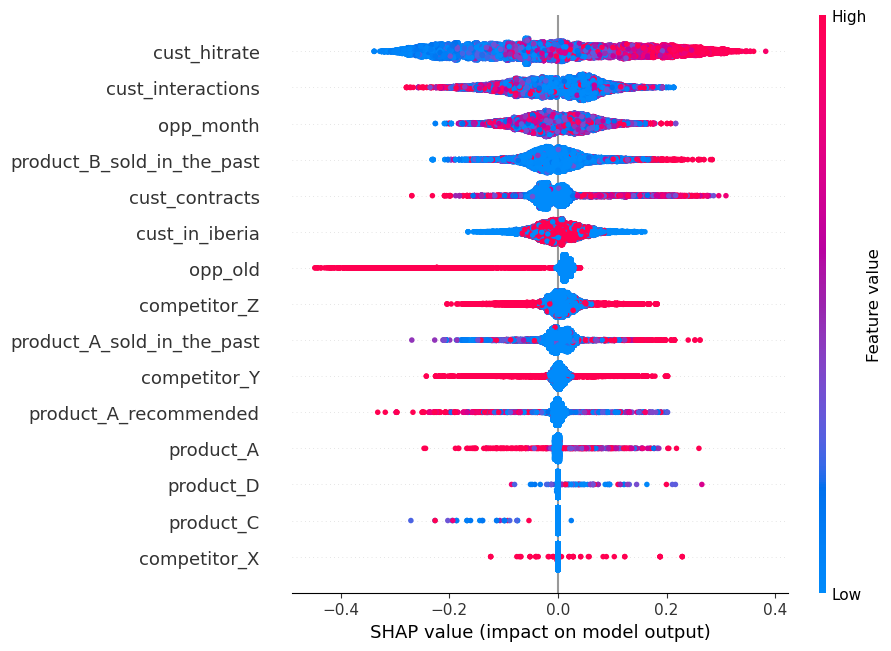

In [30]:
X = pd.read_csv("dataset.csv", usecols=range(1,16))
y = pd.read_csv("dataset.csv", usecols = [16])
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
Rf = RandomForestClassifier(n_estimators=15)
Rf.fit(X_Train,y_train)
Exits = Rf.score(X_Test,y_test)
print(f"%Exits amb tots els atributs =", Exits)
explainer = shap.TreeExplainer(Rf, X_Train)
shap_values = explainer(X_Train, check_additivity=False)
shap.plots.beeswarm(shap_values[:,:,1], max_display=16)

Aquest gràfic anomenat "beeswarm plot", ens mostra la importància de cada variable en el resultat de la venta i de quina manera hi ha contribuit. Els colors vermells indiquen valors alts de la variable mentre que els blaus indiquen valors petits, i la posició dels punts ens indica com ha contribuït a la predicció. Per exemple, un punt vermell a l'alçada de +0.2 ens indicaria que un valor alt d'aquella variable ha contribuït a que la predicció sigui 1 en aquella instància. En canvi, un punt blau a l'alçada de -0.4 ens diu que un valor baix d'aquella variable a contribuït molt a que la predicció sigui 0 en aquella instància. 

Al tenir molts punts podem observar la distribució d'aquests i veure com contribueix cada variable en les prediccions generals. En el gràfic conjunt, una major quantitat de punts en un atribut ens diu que aquest s'ha fet servir moltes vegades per fer la predicció, és a dir, que té un pes molt gran a l'hora de fer-la.

En aquest cas, observem varis factors que afecten clarament a la nostra predicció:
- cust_hitrate:
    Aquesta és la variable amb més punts, clarament el model pren moltes decisions en funció d'aquesta variable. Observant el gràfic, veiem fàcilment que valors alts de l'atribut contribueixen a predir 1 mentre que valors baixos contribueixen a predir 0. Per tant, podem deduïr que és més fàcil aconseguir una venda amb un client a qui has aconseguit vendre abans amb èxit, mentre que si en el passat no s'ha aconseguit vendre-li disminueix la probabilitat d'aconseguir la venda.
- opp_old:
    Aquesta variable també destaca molt, ja que veiem molt ràpidament que quan pren valors alts, la probabilitat d'assolir la venta disminueix dràsticament, mentre que per valors baixos la probabilitat no augmenta gaire. Així doncs, podem dir que com més temps porta disponible la oportunitat de la venda, menys probabilitat hi ha d'assolir-la, per tant, ens beneficia tancar les vendes ràpidament.
- cust_interactions:
    En aquesta variable observem que els punts estan més repartits, per tant extreure conclusions clares és difícil. Tot i així, podem veure que hi ha una tendència de punts vermells per sota de zero i de punts blaus per sobre. Això ens indica que un nombre alt d'interaccions prèvies amb el mateix client tendeix a disminuir la probabilitat de que aquest compri, mentre que clients amb qui no s'ha interactuat o s'ha interactuat poc tendeixen més a comprar.
- product_A_recommended:
    

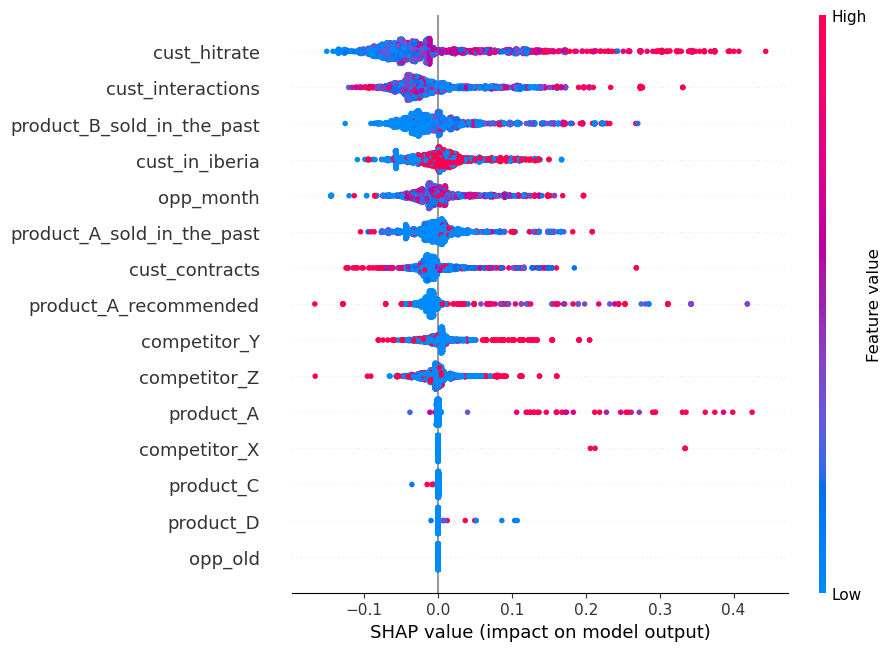

In [33]:
Older = pd.read_csv("dataset.csv", usecols=range(1,17))
Older = Older[Older["opp_old"] > Older["opp_old"].quantile(0.85)]
X_old = Older.drop("target_variable", axis=1)
y_old = Older["target_variable"]
X_old_Train, X_old_Test, y_old_train, y_old_test = train_test_split(X_old, y_old, test_size = 0.3, random_state = 1)
Rf_old = RandomForestClassifier(n_estimators=10)
Rf_old.fit(X_old_Train,y_old_train)
explainer_old = shap.TreeExplainer(Rf_old, X_old_Train)
shap_values_old = explainer_old(X_old_Train, check_additivity=False)
shap.plots.beeswarm(shap_values_old[:,:,1], max_display=16)

 95%|=================== | 7161/7518 [00:19<00:00]       

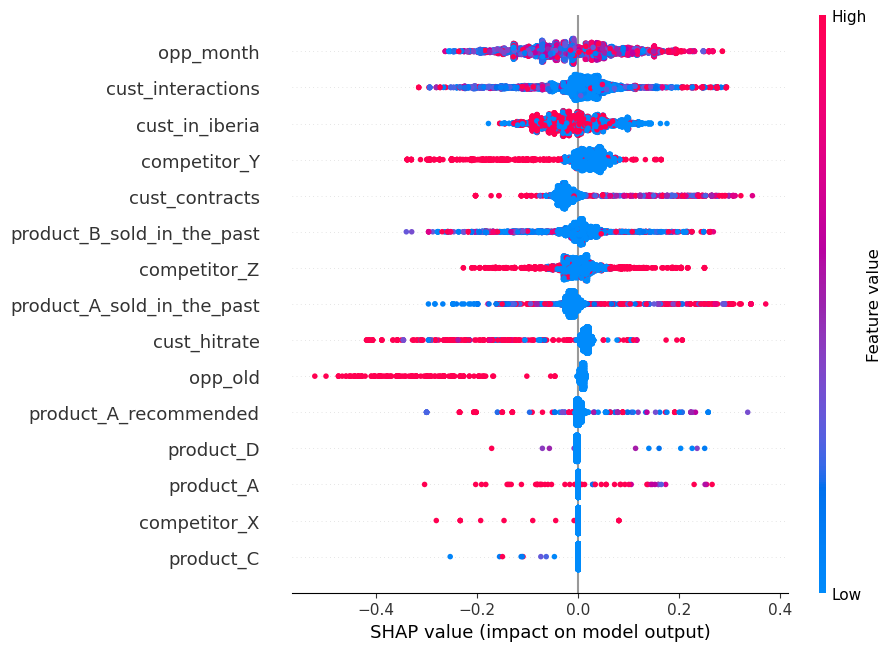

In [34]:
Low_hitr = pd.read_csv("dataset.csv", usecols=range(1,17))
Low_hitr = Low_hitr[Low_hitr["cust_hitrate"] < Low_hitr["cust_hitrate"].quantile(0.15)]
X_low = Low_hitr.drop("target_variable", axis=1)
y_low = Low_hitr["target_variable"]
X_low_Train, X_low_Test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size = 0.3, random_state = 1)
Rf_low = RandomForestClassifier(n_estimators=10)
Rf_low.fit(X_low_Train,y_low_train)
explainer_low = shap.TreeExplainer(Rf_low, X_low_Train)
shap_values_low = explainer_low(X_low_Train, check_additivity=False)
shap.plots.beeswarm(shap_values_low[:,:,1], max_display=16)

 99%|===================| 4944/5012 [00:13<00:00]        

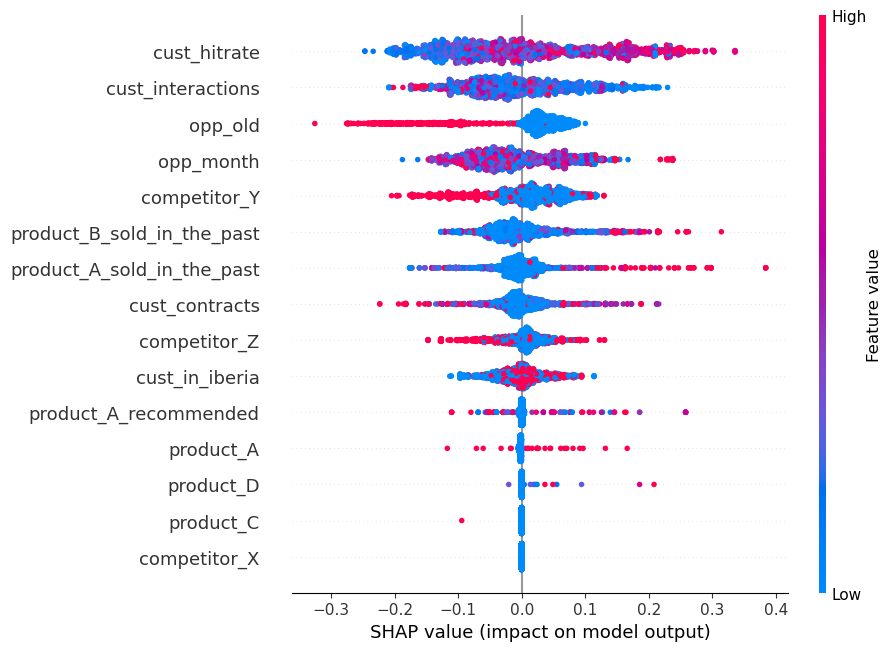

In [35]:
Inter = pd.read_csv("dataset.csv", usecols=range(1,17))
Inter = Inter[Inter["cust_interactions"] > Inter["cust_interactions"].quantile(0.9)]
X_inter = Inter.drop("target_variable", axis=1)
y_inter = Inter["target_variable"]
X_inter_Train, X_inter_Test, y_inter_train, y_inter_test = train_test_split(X_inter, y_inter, test_size = 0.3, random_state = 1)
Rf_inter = RandomForestClassifier(n_estimators=10)
Rf_inter.fit(X_inter_Train,y_inter_train)
explainer_inter = shap.TreeExplainer(Rf_inter, X_inter_Train)
shap_values_inter = explainer_inter(X_inter_Train, check_additivity=False)
shap.plots.beeswarm(shap_values_inter[:,:,1], max_display=16)